<a href="https://colab.research.google.com/github/shivendra1-cyber/-IMDB-Director-Insights/blob/main/Olympic_Medal_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()

# Access the uploaded file (example for a CSV)
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['teams.csv']))  # Replace 'teams.csv' with your file's name


Saving teams.csv to teams.csv


In [20]:
teams=pd.read_csv("teams.csv")


In [21]:
# 1. Check all column names and their types
print(teams.dtypes)

# 2. Check for extra whitespace around column names
teams.columns = teams.columns.str.strip()

# 3. Try the selection again
teams_selected = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]
print(teams_selected.head())

team              object
country           object
year               int64
events             int64
athletes           int64
age              float64
height           float64
weight           float64
medals             int64
prev_medals      float64
prev_3_medals    float64
dtype: object
  team      country  year  athletes   age  prev_medals  medals
0  AFG  Afghanistan  1964         8  22.0          0.0       0
1  AFG  Afghanistan  1968         5  23.2          0.0       0
2  AFG  Afghanistan  1972         8  29.0          0.0       0
3  AFG  Afghanistan  1980        11  23.6          0.0       0
4  AFG  Afghanistan  2004         5  18.6          0.0       0


In [22]:
teams=teams[['team','country','year','athletes','age','prev_medals','medals']]

In [23]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [24]:
# Convert relevant columns to numeric type, handling non-numeric values
teams['year'] = pd.to_numeric(teams['year'], errors='coerce')
teams['athletes'] = pd.to_numeric(teams['athletes'], errors='coerce')
teams['age'] = pd.to_numeric(teams['age'], errors='coerce')
teams['prev_medals'] = pd.to_numeric(teams['prev_medals'], errors='coerce')
teams['medals'] = pd.to_numeric(teams['medals'], errors='coerce')

# Calculate correlations, EXCLUDING the 'country' column
correlation_with_medals = teams[['year', 'athletes', 'age', 'prev_medals', 'medals']].corr()["medals"]
print(correlation_with_medals)

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [26]:
import seaborn as sns

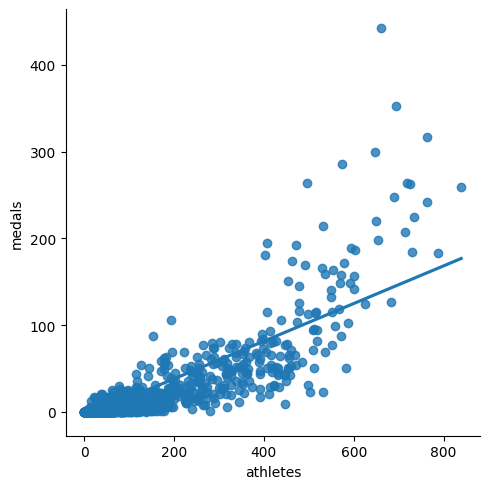

In [27]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True,ci=None)

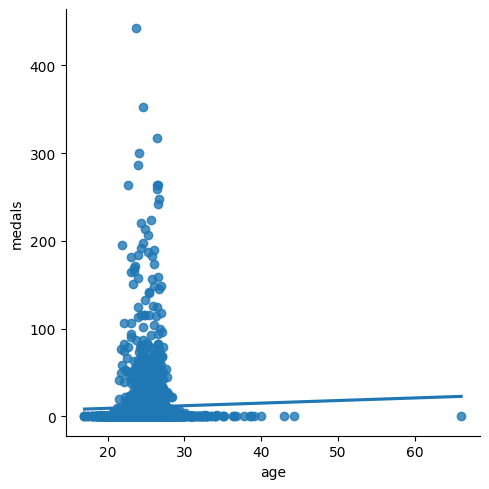

In [28]:
sns.lmplot(x='age',y='medals',data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

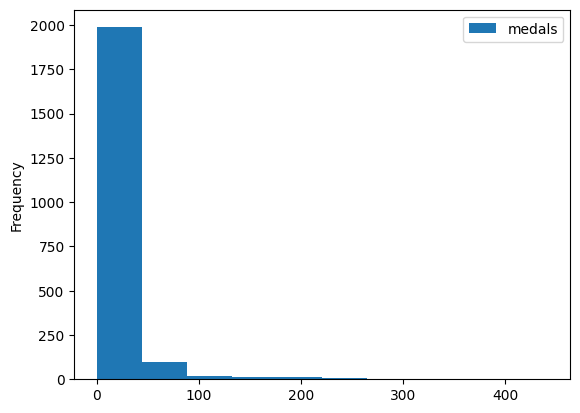

In [29]:
teams.plot.hist(y='medals')

In [30]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [31]:
teams=teams.dropna()

In [32]:


teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [33]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


In [34]:
train=teams[teams['year']<2012].copy()
test=teams[teams['year']>=2012].copy()

In [35]:
train.shape

(1609, 7)

In [36]:
test.shape

(405, 7)

In [37]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [38]:
predictors=['athletes','prev_medals']
target='medals'

In [39]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [40]:
predictions=reg.predict(test[predictors])

In [41]:
predictions.shape

(405,)

In [42]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [44]:
test['predictions']=predictions


In [45]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [46]:
test.loc[test["predictions"] < 0, "predictions"] = 0
# Use .loc for explicit assignment
test.loc[:, 'predictions'] = test['predictions'].round()

In [47]:
# Assuming your DataFrame is called 'test'
columns_to_keep = ['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals', 'predictions']

# Select only the desired columns
test = test[columns_to_keep]

print(test.head())  # Check the result

   team      country  year  athletes   age  prev_medals  medals  predictions
6   AFG  Afghanistan  2012         6  24.8          1.0       1          0.0
7   AFG  Afghanistan  2016         3  24.7          1.0       0          0.0
24  ALB      Albania  2012        10  25.7          0.0       0          0.0
25  ALB      Albania  2016         6  23.7          0.0       0          0.0
37  ALG      Algeria  2012        39  24.8          2.0       1          2.0


In [48]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [49]:
from sklearn.metrics import mean_absolute_error as mae
error=mae(test['medals'],test['predictions'])

In [50]:
error

3.2987654320987656

In [51]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [52]:
test[test['team']=='USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [53]:
test[test['team']=='IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [54]:
errors=(test['medals']-test['predictions']).abs()

In [55]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [56]:
errors_by_team=errors.groupby(test['team']).mean()

In [57]:
errors_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [58]:
medals_by_team=test['medals'].groupby(test['team']).mean()

In [59]:
errors_ratio=errors_by_team/medals_by_team

In [60]:
errors_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [63]:
import numpy as np
errors_ratio = errors_ratio[np.isfinite(errors_ratio)]

In [64]:
errors_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

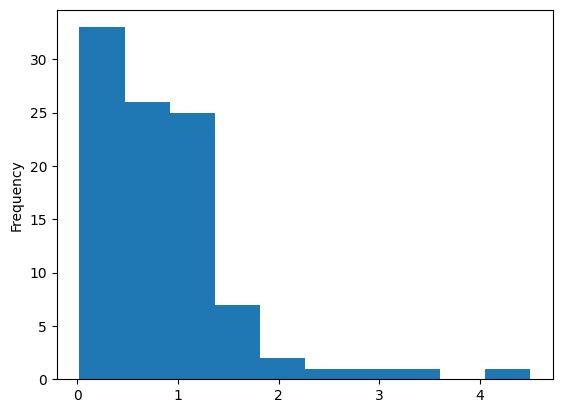

In [65]:
errors_ratio.plot.hist()

In [67]:
errors_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

**Next steps**

This model works well for countries which have a high medal count, and compete in a stable number of events annually. For countries that get fewer medals, you'd want to build this model in a different way.

Some potential next steps:

Add in some more predictors to the model, like height, athletes, or age.
Go back to the original, athlete-level data (athlete_events.csv), and try to compute some additional variables, like total number of years competing in the Olympics.
For countries with low medal counts, you can try modelling if individual athletes will win their event. You can build event-specific models to predict if athletes will win their events. Then you can add up the predicted medals for each athlete from each country. This will give you the total predicted medal count for that country.